In [25]:
import pandas as pd
import numpy as np
df=pd.read_csv("singapore.csv")
df.columns=["Year",'Type','Age_Group','Count']


In [26]:
print(df.head(3))


   Year             Type      Age_Group   Count
0  1957  Total Residents  0  -  4 Years  264727
1  1957  Total Residents  5  -  9 Years  218097
2  1957  Total Residents  10 - 14 Years  136280


     Year                           Type        Age_Group     Count
0    1957                Total Residents    0  -  4 Years  264727.0
1    1957                Total Residents    5  -  9 Years  218097.0
2    1957                Total Residents    10 - 14 Years  136280.0
3    1957                Total Residents    15 - 19 Years  135679.0
4    1957                Total Residents    20 - 24 Years  119266.0
5    1957                Total Residents    25 - 29 Years  111726.0
6    1957                Total Residents    30 - 34 Years   89925.0
7    1957                Total Residents    35 - 39 Years   82709.0
8    1957                Total Residents    40 - 44 Years   76217.0
9    1957                Total Residents    45 - 49 Years   66716.0
10   1957                Total Residents    50 - 54 Years   51794.0
11   1957                Total Residents    55 - 59 Years   37456.0
12   1957                Total Residents    60 - 64 Years   24276.0
13   1957                Total Residents    65 -

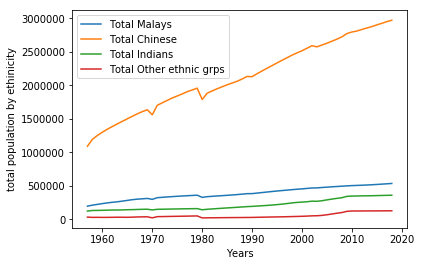

In [27]:
# df.loc[(df['Count']=='na')]= np.nan
df.replace({'na': np.nan}, inplace=True)

df['Count']=df['Count'].astype("Float32")

df=df.fillna(method ='pad')


ethinicity_df=df.loc[(df['Type'] == 'Total Malays') | (df['Type'] == 'Total Chinese')
                     |(df['Type'] == 'Total Indians')|(df['Type'] == 'Other Ethnic Groups (Total)')]

ethinicity_df = ethinicity_df[(ethinicity_df.Age_Group != '65 Years & Over')&
            (ethinicity_df.Age_Group != '70 Years & Over')&
            (ethinicity_df.Age_Group != '75 Years & Over')&(ethinicity_df.Age_Group != '80 Years & Over')]


print(df.head(354))
total_malays=[]
total_chinese=[]
total_indians=[]
total_others=[]
# ethinicity_df.loc[(ethinicity_df['Count']=='na')]=0
# ethinicity_df['Count'] = ethinicity_df['Count'].astype(int)
# print(ethinicity_df.head(25))

x=[i for i in range(1957,2019)]
for year in x:
    malays=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Malays'), 'Count'].sum()
    total_malays.append(malays)
    chinese=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Chinese'), 'Count'].sum()
    total_chinese.append(chinese)
    indians=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Indians'), 'Count'].sum()
    total_indians.append(indians)
    others=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == "Other Ethnic Groups (Total)"), 'Count'].sum()
    total_others.append(others)



import matplotlib.pyplot as plt
plt.plot(x,total_malays,label='Total Malays')
plt.plot(x,total_chinese,label="Total Chinese")
plt.plot(x,total_indians,label="Total Indians")
plt.plot(x,total_others,label="Total Other ethnic grps")
plt.xlabel('Years')
plt.ylabel('total population by ethinicity')
plt.legend()
print(" From the Plotted Data it is evident that the largest Ethnic Group in Singapore is that of the CHINESE ")


In [28]:
                          # Average growth rate for each ethinic group
    
    

Malay_AGR= (total_malays[-1]-total_malays[0])//62        # malay_Average_growth_rate

Chinese_AGR=(total_chinese[-1]-total_chinese[0])//62     # chinese_Average_growth_rate

Indians_AGR=(total_indians[-1]-total_indians[0])//62     # Indian_Average_growth_rate

Others_AGR=(total_others[-1]-total_others[0])//62        # Others_Average_growth_rate

print("Average Growth rate of Malay population over the Period of 62 years is :",Malay_AGR)
print("Average Growth rate of Chinese population over the Period of 62 years is :",Chinese_AGR)
print("Average Growth rate of Indian population over the Period of 62 years is :",Indians_AGR)
print("Average Growth rate of Other Ethinic Group population over the Period of 62 years is :",Others_AGR)

Average Growth rate of Malay population over the Period of 62 years is : 5463.0
Average Growth rate of Chinese population over the Period of 62 years is : 30301.0
Average Growth rate of Indian population over the Period of 62 years is : 3813.0
Average Growth rate of Other Ethinic Group population over the Period of 62 years is : 1523.0


Text(0, 0.5, 'percentage %')

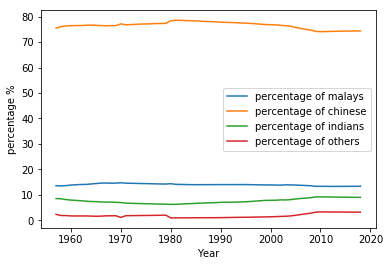

In [29]:
# Proportion contributed by each of the ethnic groups

malay_percent=[]
chinese_percent=[]
indian_percent=[]
other_percent=[]
for i in range (62):
    n1=total_malays[i]
    n2=total_chinese[i]
    n3=total_indians[i]
    n4=total_others[i]
    total_pop=(n1 + n2 + n3 + n4)
    
    malay_percent.append(float('{0:.2f}'.format((n1/total_pop)*100)))
    chinese_percent.append(float('{0:.2f}'.format((n2/total_pop)*100)))
    indian_percent.append(float('{0:.2f}'.format((n3/total_pop)*100)))
    other_percent.append(float('{0:.2f}'.format((n4/total_pop)*100)))

plt.plot(x,malay_percent,label="percentage of malays")
plt.plot(x,chinese_percent,label="percentage of chinese")
plt.plot(x,indian_percent,label="percentage of indians")
plt.plot(x,other_percent,label="percentage of others")
plt.legend()
plt.xlabel("Year")
plt.ylabel("percentage %")

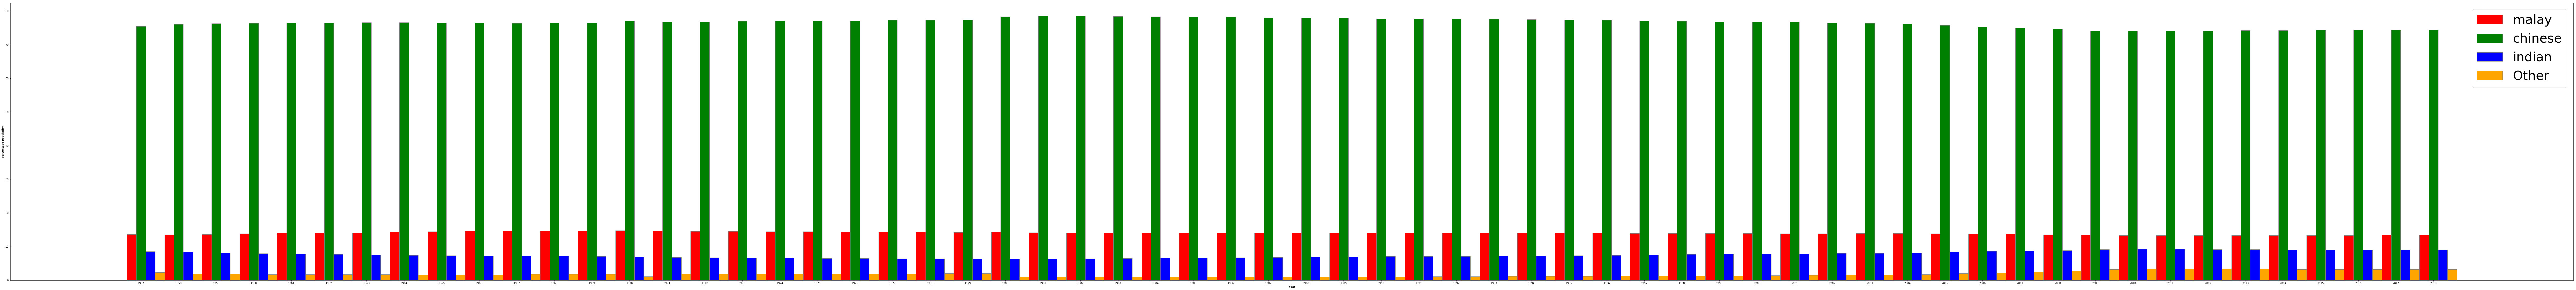

In [30]:
               #bar plot to show the percentage of each ethnic group over the years



   
# set width of bar 

barWidth = 0.25

fig = plt.subplots(figsize =(180, 20)) 

   
# Set position of bar on X axis 

br1 = np.arange(62) 

br2 = [p + barWidth for p in br1] 

br3 = [p + barWidth for p in br2] 

br4=  [p + barWidth for p in br3]

   
# Make the plot 

plt.bar(br1, malay_percent, color ='r', width = barWidth, 

        edgecolor ='grey', label ='malay') 

plt.bar(br2, chinese_percent, color ='g', width = barWidth, 

        edgecolor ='grey', label ='chinese') 

plt.bar(br3, indian_percent, color ='b', width = barWidth, 

        edgecolor ='grey', label ='indian') 

plt.bar(br4, other_percent, color ='orange', width = barWidth, 

        edgecolor ='grey', label ='Other') 

   
# Adding Xticks  

plt.xlabel('Year', fontweight ='bold') 

plt.ylabel('percentage population', fontweight ='bold') 

plt.xticks([r + barWidth for r in range(62)], x)

        
plt.legend(prop={"size":50})

   
plt.show()


In [31]:
# analysis on age groups

age_df=df.loc[(df['Type'] == 'Total Residents') & (df['Age_Group'] != '65 Years & Over') & (df['Age_Group'] != '70 Years & Over')
             & (df['Age_Group'] != '75 Years & Over') & (df['Age_Group'] != '80 Years & Over')]
print(age_df.head(5))

   Year             Type      Age_Group     Count
0  1957  Total Residents  0  -  4 Years  264727.0
1  1957  Total Residents  5  -  9 Years  218097.0
2  1957  Total Residents  10 - 14 Years  136280.0
3  1957  Total Residents  15 - 19 Years  135679.0
4  1957  Total Residents  20 - 24 Years  119266.0


In [32]:
age_groups=(age_df['Age_Group'].unique()).tolist()
print(age_groups)


['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years', '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years', '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years', '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years', '80 - 84 Years', '85 Years & Over']


62 0  -  4 Years
62 5  -  9 Years
62 10 - 14 Years
62 15 - 19 Years
62 20 - 24 Years
62 25 - 29 Years
62 30 - 34 Years
62 35 - 39 Years
62 40 - 44 Years
62 45 - 49 Years
62 50 - 54 Years
62 55 - 59 Years
62 60 - 64 Years
62 65 - 69 Years
62 70 - 74 Years
62 75 - 79 Years
62 80 - 84 Years
62 85 Years & Over


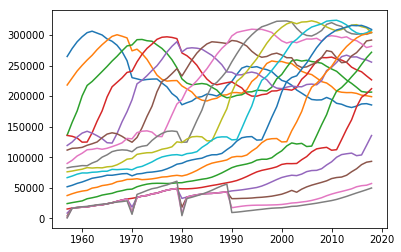

In [34]:
age_dict={}
for group in age_groups:
    age_dict[group]=(age_df[(age_df['Age_Group']==group)]['Count']).tolist()   
    

for item in age_dict:
    plt.plot(x,age_dict[item],label=item)
plt.    